<center><b>
    <h1>Visualizing and Understanding the Relationship Between High School Retention Rates and Student Punishment in the United States</h1><br>
    <span>Noah Fichter</span><br>
    <span>CMSC320 - Fall 2019 - John Dickerson</span>
</b></center>

<hr>
<center><h2>Introduction</h2></center>
<p>
The Office for Civil Rights (OCR) is a subdepartment in the United States Department of Education that collects data on a variety of factors that relate to civil rights of students, including student characteristics like race and gender, intances of bullying, retention rates, and much more. This data is collected at a school-wide level; each school reports the data to the OCR.
    
This tutorial will explore the OCR's <a href="https://catalog.data.gov/dataset/civil-rights-data-collection-2013-14">Civil Rights Data Collection dataset</a> for the 2013-2014 school year. My goal is to understand which factors correlate strongest with high school retention rates (i.e., the rate at which students are required to repeat a grade). In addition, I will make a model that allows us to predict retention rates based on these factors. Because education policy is so different from state to state, I will analyze this at a state level. (Education policy is also very different on a district to district level, but there are more than 13,000 school districts, some with very few schools, so I felt that doing it at the state level was a nice middle ground.)

For those interested in education policy, this will be an insightful tutorial into both how education data analysis is done at a broad level and into potential policy alternatives that may mitigate the factors that correlate to high school retention. Reducing high school retention rates is incredibly important, as it allows students to enter the workforce faster. It is especially important for low-income students whose families may be relying on them to begin working sooner.

Because the data collected is not part of a randomized-control trial study (RCT), we cannot be sure that reducing any of the factors that correlate with high school retention rates will result in a reduction of high school retention rates. However, this tutorial may give insight into which factors would be worth researching further in an RCT or quasi-experimental study.
</p>

<h4>Further background readings</h4>
<p>Before we get started, here are some quick and easily-digestable articles on the effect that retention in high school has on students.
<ul>
    <li><a href="https://www.thoughtco.com/essential-questions-concerning-grade-retention-3194685">Essential Questions Concerning Grade Retention</a></li>
    <li><a href="http://www.ascd.org/publications/educational-leadership/mar08/vol65/num06/Grade-Retention.aspx">What Research Says About Grade Retention</a></li>
    <li><a href="https://www.rand.org/pubs/research_briefs/RB10025.html">How Does Repeating a Grade Impact Students' High School Persistence and Behavior?</a></li>
</ul>
In addition, here are some articles about the use of physical and mental punishment in schools. This will be important in the next section, because the majority of the independent variables I choose have to do with punishment.
<ul>
    <li><a href="https://www.nytimes.com/2018/12/13/us/corporal-punishment-school-tennessee.html">In 19 States, It's Still Legal to Spank Children in Public Schools</a></li>
    <li><a href="https://www.npr.org/sections/ed/2017/04/12/521944429/where-corporal-punishment-is-still-used-its-roots-go-deep">Where Corporal Punishment Is Still Used In Schools, Its Roots Run Deep</a></li>
    <li><a href="https://www.npr.org/2019/06/15/729955321/how-some-schools-restrain-or-seclude-students-a-look-at-a-controversial-practice">How Some Schools Restrain Or Seclude Students: A Look At A Controversial Practice</a></li>
</ul>
Finally, <a href="https://escholarship.org/uc/item/7zc0c135">here's</a> a good paper that discusses the effects of punishment on school retention.
</p>

<hr>
<center><h2>Getting Started with the Data</h2></center>
<p>
I will use Python 3 with some popular, easily-accessible libraries: <a href="https://pandas.pydata.org/pandas-docs/stable/">pandas</a>, <a href="https://docs.scipy.org/doc/numpy/user/">numpy</a>, <a href="https://matplotlib.org/contents.html">matplotlib</a>, <a href="https://scikit-learn.org/stable/documentation.html">scikit-learn</a>, <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">scipy.stats</a>, <a href="https://seaborn.pydata.org/">seaborn</a>, <a href="https://www.statsmodels.org/stable/index.html">statsmodels</a> and <a href="https://ipywidgets.readthedocs.io/en/latest/">ipywidgets</a>.
</p>

In [24]:
# Imports
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings

from ipywidgets import widgets, interactive
from scipy.stats import f as ftest
from sklearn import linear_model, model_selection
warnings.filterwarnings('ignore')

<p>
The dataset I am using is the United States Department of Education's Office's for Civil Rights <a href="https://catalog.data.gov/dataset/civil-rights-data-collection-2013-14">Civil Rights Data Collection dataset</a> for the 2013-2014 school year.
</p>

<h3>Preprocessing the Data</h3>
<p>
The raw dataset contains nearly 2,000 <i>columns</i>. To make this tutorial more understandable, I chose 19 columns corresponding to 10 factors or independent variables (9 of which are separated by Male/Female, which we will later combine into one variable), that I hypothesized would have an effect on high school retention rates. These ten factors and the correspoding questions we should ask about them are (in no particular order):
    <ul>
        <li>Total number of students enrolled --> Does a larger school have a higher retention rate?</li>
        <li>Overall white student enrollment --> Does a student with a lower percentage of white students have a higher retention rate?
            <ul><li>Why? --> This is important because of the achievement gap between white students and students of color (read more about the achievement gap <a href="https://www.edglossary.org/achievement-gap/">here</a>). If we know that segregated schools with high populations of students of color have higher retention rates, it can help inform our policy decisions.
            </li></ul>
        </li>
        <li>Total number of students without disabilities who received corporal punishment --> Does a school with more corporal punishment have higher retention rates?</li>
        <li>Total number of students without disabilities who received more than one out-of-school suspension --> Does a school with more "repeat-offender" out-of-school suspension recipients have higher retention rates?</li>
        <li>Total number of students without disabilities who received one or more in-school suspension --> Does a school that gives more in-school suspensions have higher retention rates?</li>
        <li>Total number of students without disabilities who received an expulsion without educational services --> Does a school that gives more expulsions have higher retention rates?</li>
        <li>Students without disabilities who were referred to a law-enforcement agency or official --> Does a school that refers more students to LEAs have higher retention rates?</li>
        <li>Students without disabilities who received a school-related arrest --> Does a school with more school-related arrests have higher retention rates?</li>
        <li>Total number of students reported for engaging in harassment or bullying on the basis of race, color or national origin --> Does a school with more race-/ethnicity-related bullying have higher retention rates?</li>
        <li>Number of instances of seclusion: Students without Disabilities --> Does a school that puts students into seclusion more often have higher retention rates?</li>
    </ul>
    
There are undoubtedly a slew of other factors that I could have analyzed. Regardless, I deleted the other ~2,000 columns. In addition to these 10 columns, I kept data about the school's state and the number of students it has enrolled in each grade from PreK-12. This is important, because it will allow me to filter out schools that aren't high schools (i.e. schools that do not have students in all and only grades 9-12). I also kept columns that determined if a school was a juvenile, special education, charter, magnet, or "alternative" school, because I wanted to remove any schools that are marked as one of these — I am focusing on traditional public high schools. I also kept the 8 columns (separated by M/F) that indicate how many students were retained in grades 9-12, as this is my dependent variable.
</p>

<h3>Reading the Data</h3>

<p>
After preprocessing, I was left with 46 columns of data: 1 column for the school's state, 5 columns for the school type, 14 columns for the grades the school contains, 8 columns for the school's retention statistics, 2 columns for the school's total enrollment (M/F), 2 columns for the school's Black student enrollment, 2 columns for out-of-school suspensions, 2 for in-school-suspensions, 2 for expulsions, 2 for LEA referrals, 2 for school-related arrests, 2 for race-related bullying, and 1 for number of instances of seclusion. Let's take a look:
</p>

In [2]:
data = pd.read_csv('data.csv')
pd.set_option('display.max_columns', 50) # The default is ~20 and we have 46
data.head()

,LEA_STATE,JJ,SCH_GRADE_PS,SCH_GRADE_KG,SCH_GRADE_G01,SCH_GRADE_G02,SCH_GRADE_G03,SCH_GRADE_G04,SCH_GRADE_G05,SCH_GRADE_G06,SCH_GRADE_G07,SCH_GRADE_G08,SCH_GRADE_G09,SCH_GRADE_G10,SCH_GRADE_G11,SCH_GRADE_G12,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,TOT_ENR_M,TOT_ENR_F,SCH_ENR_BL_M,SCH_ENR_BL_F,TOT_RET_G09_M,TOT_RET_G09_F,TOT_RET_G10_M,TOT_RET_G10_F,TOT_RET_G11_M,TOT_RET_G11_F,TOT_RET_G12_M,TOT_RET_G12_F,TOT_DISCWODIS_CORP_M,TOT_DISCWODIS_CORP_F,TOT_DISCWODIS_ISS_M,TOT_DISCWODIS_ISS_F,TOT_DISCWODIS_MULTOOS_M,TOT_DISCWODIS_MULTOOS_F,TOT_DISCWODIS_EXPWOE_M,TOT_DISCWODIS_EXPWOE_F,TOT_DISCWODIS_REF_M,TOT_DISCWODIS_REF_F,TOT_DISCWODIS_ARR_M,TOT_DISCWODIS_ARR_F,TOT_HBREPORTED_RAC_M,TOT_HBREPORTED_RAC_F,SCH_RSINSTANCES_SECL_WODIS
0,AL,YES,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,1798,0,1001,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,-9,-9,-9,-9,0,0,0
1,AL,YES,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,994,0,599,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,-9,-9,-9,-9,0,0,0
2,AL,YES,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,910,0,500,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,-9,-9,-9,-9,0,0,0
3,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,307,328,5,8,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,87,57,7,4,0,0,0,0,0,0,4,0,0
4,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,NO,NO,537,577,14,11,10,6,2,0,-9,-9,-9,-9,-9,-9,9,2,7,2,0,0,4,0,0,0,0,0,0


<p>
Woah. What a mess! What do those column names mean? And why are there so many? And what's up with all the -9s? We have a few tasks to do with regards to cleaning up the data:
<ol>
    <li>Rename columns to be more understandable</li>
    <li>Delete rows that are marked "YES" for any special school type</li>
    <li>Delete columns for special school types</li>
    <li>Delete rows that are marked "YES" for any grade below 9th</li>
    <li>Delete rows that are marked "NO" for any grade above 8th</li>
    <li>Delete columns for grades served</li>
    <li>Convert entries with -9 to 0
        <ul>
            <li>-9 is the OCR's code for N/A. For example, a school with -9 students receiving corporal punishment means that school doesn't employ corporal punishment as a punishment tactic. For our purposes, we can just convert these to 0.</li>
        </ul>
    </li>
    <li>Combine retention statistic columns into one</li>
    <li>Combine columns split by Male/Female into one</li>
    <li>Create a column for X per student (e.g. number of out of school suspensions per student)</li>
</ol>
</p>

<h3>Tidying and Modifying the Data</h3>
<h4>1. Rename columns to be more understandable</h4>
<p>OCR provides a handy file that explains what each of these columns means (it's how I discerned which columns to use in the first place). I'm going to make a dictionary that maps the existing column name to a more readable one, and then change all the column names in accordance to that dictionary.

In [3]:
name_map = {
    'LEA_STATE': 'state',
    'SCH_GRADE_PS': 'has_prek',
    'SCH_GRADE_KG': 'has_k',
    'SCH_GRADE_G01': 'has_1',
    'SCH_GRADE_G02': 'has_2',
    'SCH_GRADE_G03': 'has_3',
    'SCH_GRADE_G04': 'has_4',
    'SCH_GRADE_G05': 'has_5',
    'SCH_GRADE_G06': 'has_6',
    'SCH_GRADE_G07': 'has_7',
    'SCH_GRADE_G08': 'has_8',
    'SCH_GRADE_G09': 'has_9',
    'SCH_GRADE_G10': 'has_10',
    'SCH_GRADE_G11': 'has_11',
    'SCH_GRADE_G12': 'has_12',
    'SCH_GRADE_G13': 'has_13',
    'JJ': 'is_juvenile',
    'SCH_STATUS_SPED': 'is_special_ed',
    'SCH_STATUS_MAGNET': 'is_magnet',
    'SCH_STATUS_CHARTER': 'is_charter',
    'SCH_STATUS_ALT': 'is_alternative',
    'TOT_ENR_M': 'total_male_students',
    'TOT_ENR_F': 'total_female_students',
    'SCH_ENR_BL_M': 'total_black_male_students',
    'SCH_ENR_BL_F': 'total_black_female_students',
    'TOT_RET_G09_M': 'total_retention_male_grade9',
    'TOT_RET_G09_F': 'total_retention_female_grade9',
    'TOT_RET_G10_M': 'total_retention_male_grade10',
    'TOT_RET_G10_F': 'total_retention_female_grade10',
    'TOT_RET_G11_M': 'total_retention_male_grade11',
    'TOT_RET_G11_F': 'total_retention_female_grade11',
    'TOT_RET_G12_M': 'total_retention_male_grade12',
    'TOT_RET_G12_F': 'total_retention_female_grade12',
    'TOT_DISCWODIS_CORP_M': 'total_corporal_male',
    'TOT_DISCWODIS_CORP_F': 'total_corporal_female',
    'TOT_DISCWODIS_ISS_M': 'total_inschool_suspension_male',
    'TOT_DISCWODIS_ISS_F': 'total_inschool_suspension_female',
    'TOT_DISCWODIS_MULTOOS_M': 'total_outofschool_suspension_male',
    'TOT_DISCWODIS_MULTOOS_F': 'total_outofschool_suspension_female',
    'TOT_DISCWODIS_EXPWOE_M': 'total_explusion_male',
    'TOT_DISCWODIS_EXPWOE_F': 'total_explusion_female',
    'TOT_DISCWODIS_REF_M': 'total_LEA_ref_male',
    'TOT_DISCWODIS_REF_F': 'total_LEA_ref_female',
    'TOT_DISCWODIS_ARR_M': 'total_arrests_male',
    'TOT_DISCWODIS_ARR_F': 'total_arrests_female',
    'TOT_HBREPORTED_RAC_M': 'total_race_bullying_male',
    'TOT_HBREPORTED_RAC_F': 'total_race_bullying_female',
    'SCH_RSINSTANCES_SECL_WODIS': 'total_seclusion_instances'
}

data = data.rename(columns=name_map)
data.head()

,state,is_juvenile,has_prek,has_k,has_1,has_2,has_3,has_4,has_5,has_6,has_7,has_8,has_9,has_10,has_11,has_12,is_special_ed,is_magnet,is_charter,is_alternative,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_retention_male_grade9,total_retention_female_grade9,total_retention_male_grade10,total_retention_female_grade10,total_retention_male_grade11,total_retention_female_grade11,total_retention_male_grade12,total_retention_female_grade12,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances
0,AL,YES,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,1798,0,1001,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,-9,-9,-9,-9,0,0,0
1,AL,YES,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,994,0,599,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,-9,-9,-9,-9,0,0,0
2,AL,YES,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO,YES,910,0,500,0,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,-9,-9,-9,-9,0,0,0
3,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,307,328,5,8,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,87,57,7,4,0,0,0,0,0,0,4,0,0
4,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,NO,NO,537,577,14,11,10,6,2,0,-9,-9,-9,-9,-9,-9,9,2,7,2,0,0,4,0,0,0,0,0,0


<h4>2. Delete rows that are marked "YES" for any special school type</h4>
<p>As mentioned before, we don't want any special schools -- we're focused specifically on traditional public schools. Let's get rid of the columns that mark YES for any special school type.</p>

In [4]:
data.drop(data[(data['is_juvenile'] == 'YES') |
               (data['is_special_ed'] == 'YES') |
               (data['is_magnet'] == 'YES') |
               (data['is_charter'] == 'YES') |
               (data['is_alternative'] == 'YES')].index, inplace=True)
data.head()

,state,is_juvenile,has_prek,has_k,has_1,has_2,has_3,has_4,has_5,has_6,has_7,has_8,has_9,has_10,has_11,has_12,is_special_ed,is_magnet,is_charter,is_alternative,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_retention_male_grade9,total_retention_female_grade9,total_retention_male_grade10,total_retention_female_grade10,total_retention_male_grade11,total_retention_female_grade11,total_retention_male_grade12,total_retention_female_grade12,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances
3,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,307,328,5,8,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,87,57,7,4,0,0,0,0,0,0,4,0,0
4,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,NO,NO,NO,NO,537,577,14,11,10,6,2,0,-9,-9,-9,-9,-9,-9,9,2,7,2,0,0,4,0,0,0,0,0,0
5,AL,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,331,349,5,5,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,7,2,4,0,0,0,2,0,0,0,2,2,0
6,AL,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,381,402,8,11,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,37,5,2,0,0,0,0,0,0,0,0,0,0
7,AL,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,243,236,5,5,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,0,0,0,0,0,0,0,0,0


<h4>3. Delete columns for special school types</h4>
<p>Now that we've deleted all the rows that mark YES for any special school type, we can delete all of those columns.</p>

In [5]:
del data['is_juvenile']
del data['is_special_ed']
del data['is_magnet']
del data['is_charter']
del data['is_alternative']
data.head()

,state,has_prek,has_k,has_1,has_2,has_3,has_4,has_5,has_6,has_7,has_8,has_9,has_10,has_11,has_12,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_retention_male_grade9,total_retention_female_grade9,total_retention_male_grade10,total_retention_female_grade10,total_retention_male_grade11,total_retention_female_grade11,total_retention_male_grade12,total_retention_female_grade12,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances
3,AL,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,307,328,5,8,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,87,57,7,4,0,0,0,0,0,0,4,0,0
4,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,537,577,14,11,10,6,2,0,-9,-9,-9,-9,-9,-9,9,2,7,2,0,0,4,0,0,0,0,0,0
5,AL,NO,NO,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,331,349,5,5,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,7,2,4,0,0,0,2,0,0,0,2,2,0
6,AL,NO,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,381,402,8,11,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,37,5,2,0,0,0,0,0,0,0,0,0,0
7,AL,YES,YES,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,243,236,5,5,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,0,0,0,0,0,0,0,0,0,0,0,0,0


<h4>4. Delete rows that are marked "YES" for any grade below 9th<br>
    5. Delete rows that are marked "NO" for any grade above 8th</h4>

In [6]:
# Create a list of all suffixes for the has_ columns from prek to 8th grade
del_for_yes = ['prek','k']
del_for_yes.extend([str(x) for x in range(1,8)])
# Create a list of all suffixes for the has_ columns from 9th to 12th grade
del_for_no = ['9','10','11','12']

for suffix in del_for_yes:
    data.drop(data[data['has_'+suffix] == 'YES'].index, inplace=True)
for suffix in del_for_no:
    data.drop(data[data['has_'+suffix] == 'NO'].index, inplace=True)
data.head()

,state,has_prek,has_k,has_1,has_2,has_3,has_4,has_5,has_6,has_7,has_8,has_9,has_10,has_11,has_12,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_retention_male_grade9,total_retention_female_grade9,total_retention_male_grade10,total_retention_female_grade10,total_retention_male_grade11,total_retention_female_grade11,total_retention_male_grade12,total_retention_female_grade12,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances
4,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,537,577,14,11,10,6,2,0,-9,-9,-9,-9,-9,-9,9,2,7,2,0,0,4,0,0,0,0,0,0
13,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,280,270,5,5,-9,-9,-9,-9,-9,-9,-9,-9,43,5,103,50,2,0,0,0,0,0,0,0,0,0,0
15,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,257,237,2,2,-9,-9,-9,-9,-9,-9,-9,-9,11,0,0,0,5,2,0,0,0,0,0,0,0,0,0
19,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,199,180,2,2,-9,-9,-9,-9,-9,-9,-9,-9,0,0,24,14,2,2,0,0,0,0,0,0,0,0,0
25,AL,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,YES,1395,1362,365,386,26,20,4,2,6,2,14,9,-9,-9,0,2,11,4,0,0,11,7,4,0,0,0,0


<h4>6. Delete columns for grades served</h4>
<p>Now that we've deleted any schools that aren't only highschools serving grades 9-12, we can delete the columns that indicate the grades that a school serves.</p>

In [7]:
to_del = ['prek','k']
to_del.extend([str(x) for x in range(1,13)])
for suffix in to_del:
    del data['has_'+suffix]
data.head()

,state,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_retention_male_grade9,total_retention_female_grade9,total_retention_male_grade10,total_retention_female_grade10,total_retention_male_grade11,total_retention_female_grade11,total_retention_male_grade12,total_retention_female_grade12,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances
4,AL,537,577,14,11,10,6,2,0,-9,-9,-9,-9,-9,-9,9,2,7,2,0,0,4,0,0,0,0,0,0
13,AL,280,270,5,5,-9,-9,-9,-9,-9,-9,-9,-9,43,5,103,50,2,0,0,0,0,0,0,0,0,0,0
15,AL,257,237,2,2,-9,-9,-9,-9,-9,-9,-9,-9,11,0,0,0,5,2,0,0,0,0,0,0,0,0,0
19,AL,199,180,2,2,-9,-9,-9,-9,-9,-9,-9,-9,0,0,24,14,2,2,0,0,0,0,0,0,0,0,0
25,AL,1395,1362,365,386,26,20,4,2,6,2,14,9,-9,-9,0,2,11,4,0,0,11,7,4,0,0,0,0


<h4>7. Convert entries with -9 to 0</h4>
<p>As explained above, -9 is the OCR's code for N/A. For example, a school with -9 students receiving corporal punishment means that school doesn't employ corporal punishment as a punishment tactic. For our purposes, we can just convert these to 0.</p>

In [8]:
data = data.replace(-9, 0)
data.head()

,state,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_retention_male_grade9,total_retention_female_grade9,total_retention_male_grade10,total_retention_female_grade10,total_retention_male_grade11,total_retention_female_grade11,total_retention_male_grade12,total_retention_female_grade12,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances
4,AL,537,577,14,11,10,6,2,0,0,0,0,0,0,0,9,2,7,2,0,0,4,0,0,0,0,0,0
13,AL,280,270,5,5,0,0,0,0,0,0,0,0,43,5,103,50,2,0,0,0,0,0,0,0,0,0,0
15,AL,257,237,2,2,0,0,0,0,0,0,0,0,11,0,0,0,5,2,0,0,0,0,0,0,0,0,0
19,AL,199,180,2,2,0,0,0,0,0,0,0,0,0,0,24,14,2,2,0,0,0,0,0,0,0,0,0
25,AL,1395,1362,365,386,26,20,4,2,6,2,14,9,0,0,0,2,11,4,0,0,11,7,4,0,0,0,0


<h4>8. Combine retention statistic columns into one</h4>

In [9]:
data['retention'] = data['total_retention_male_grade9'] + data['total_retention_female_grade9'] + data['total_retention_male_grade10'] + data['total_retention_female_grade10'] + data['total_retention_male_grade11'] + data['total_retention_female_grade11'] + data['total_retention_male_grade12'] + data['total_retention_female_grade12']

mf = ['male','female']
grd = ['9','10','11','12']
combos = list(itertools.product(*[mf,grd])) # All possible combinations so I don't have to type them out
for combo in combos:
    del data['total_retention_'+combo[0]+'_grade'+combo[1]]
data.head()

,state,total_male_students,total_female_students,total_black_male_students,total_black_female_students,total_corporal_male,total_corporal_female,total_inschool_suspension_male,total_inschool_suspension_female,total_outofschool_suspension_male,total_outofschool_suspension_female,total_explusion_male,total_explusion_female,total_LEA_ref_male,total_LEA_ref_female,total_arrests_male,total_arrests_female,total_race_bullying_male,total_race_bullying_female,total_seclusion_instances,retention
4,AL,537,577,14,11,0,0,9,2,7,2,0,0,4,0,0,0,0,0,0,18
13,AL,280,270,5,5,43,5,103,50,2,0,0,0,0,0,0,0,0,0,0,0
15,AL,257,237,2,2,11,0,0,0,5,2,0,0,0,0,0,0,0,0,0,0
19,AL,199,180,2,2,0,0,24,14,2,2,0,0,0,0,0,0,0,0,0,0
25,AL,1395,1362,365,386,0,0,0,2,11,4,0,0,11,7,4,0,0,0,0,83


<h4>9. Combine columns split by Male/Female into one</h4>

In [10]:
data['num_students'] = data['total_male_students'] + data['total_female_students']
del data['total_male_students']
del data['total_female_students']

data['num_black_students'] = data['total_black_male_students'] + data['total_black_female_students']
del data['total_black_male_students']
del data['total_black_female_students']

data['corporal'] = data['total_corporal_male'] + data['total_corporal_female']
del data['total_corporal_male']
del data['total_corporal_female']

data['iss'] = data['total_inschool_suspension_male'] + data['total_inschool_suspension_female']
del data['total_inschool_suspension_male']
del data['total_inschool_suspension_female']

data['oss'] = data['total_outofschool_suspension_male'] + data['total_outofschool_suspension_female']
del data['total_outofschool_suspension_male']
del data['total_outofschool_suspension_female']

data['expulsion'] = data['total_explusion_male'] + data['total_explusion_female']
del data['total_explusion_male']
del data['total_explusion_female']

data['LEA_referrals'] = data['total_LEA_ref_male'] + data['total_LEA_ref_female']
del data['total_LEA_ref_male']
del data['total_LEA_ref_female']

data['school_arrests'] = data['total_arrests_male'] + data['total_arrests_female']
del data['total_arrests_male']
del data['total_arrests_female']

data['race_related_bullying'] = data['total_race_bullying_male'] + data['total_race_bullying_female']
del data['total_race_bullying_male']
del data['total_race_bullying_female']

data.head()

,state,total_seclusion_instances,retention,num_students,num_black_students,corporal,iss,oss,expulsion,LEA_referrals,school_arrests,race_related_bullying
4,AL,0,18,1114,25,0,11,9,0,4,0,0
13,AL,0,0,550,10,48,153,2,0,0,0,0
15,AL,0,0,494,4,11,0,7,0,0,0,0
19,AL,0,0,379,4,0,38,4,0,0,0,0
25,AL,0,83,2757,751,0,2,15,0,18,4,0


<h4>10. Create a column for X per student</h4>
<p>We have raw numbers, but if a school has, for example, 10 in school suspensions, that means wildly different things if it has 100 total students or 10000 total students. Let's create an new independent variable for every current independent variable that divides the number of Black students or instances of ISS/OSS/expulsion/LEA referrals/school-related arrests/race-related bullying by the total number of students in the school. We also want to convert our raw number of retentions into a similar new dependent variable in which we examine the number of retentions divided by number of students.</p>

In [11]:
data['percent_Black_students'] = data['num_black_students'] / data['num_students']
del data['num_black_students']

# The "_ps" suffix indicates that this variable is X Per Student
data['corporal_ps'] = data['corporal'] / data['num_students']
del data['corporal']

data['iss_ps'] = data['iss'] / data['num_students']
del data['iss']

data['oss_ps'] = data['oss'] / data['num_students']
del data['oss']

data['expulsion_ps'] = data['expulsion'] / data['num_students']
del data['expulsion']

data['LEA_referrals_ps'] = data['LEA_referrals'] / data['num_students']
del data['LEA_referrals']

data['school_arrests_ps'] = data['school_arrests'] / data['num_students']
del data['school_arrests']

data['race_related_bullying_ps'] = data['race_related_bullying'] / data['num_students']
del data['race_related_bullying']

data['retention_ps'] = data['retention'] / data['num_students']
del data['retention']

data.head()

,state,total_seclusion_instances,num_students,percent_Black_students,corporal_ps,iss_ps,oss_ps,expulsion_ps,LEA_referrals_ps,school_arrests_ps,race_related_bullying_ps,retention_ps
4,AL,0,1114,0.022442,0.000000,0.009874,0.008079,0.0,0.003591,0.000000,0.0,0.016158
13,AL,0,550,0.018182,0.087273,0.278182,0.003636,0.0,0.000000,0.000000,0.0,0.000000
15,AL,0,494,0.008097,0.022267,0.000000,0.014170,0.0,0.000000,0.000000,0.0,0.000000
19,AL,0,379,0.010554,0.000000,0.100264,0.010554,0.0,0.000000,0.000000,0.0,0.000000
25,AL,0,2757,0.272398,0.000000,0.000725,0.005441,0.0,0.006529,0.001451,0.0,0.030105


<p>Great! Lastly, let's order our columns in a way that makes the most sense.</p>

In [12]:
data = data[['state','retention_ps','num_students','percent_Black_students','corporal_ps','iss_ps',
             'oss_ps','expulsion_ps','LEA_referrals_ps','school_arrests_ps','race_related_bullying_ps']]
data.head()

,state,retention_ps,num_students,percent_Black_students,corporal_ps,iss_ps,oss_ps,expulsion_ps,LEA_referrals_ps,school_arrests_ps,race_related_bullying_ps
4,AL,0.016158,1114,0.022442,0.000000,0.009874,0.008079,0.0,0.003591,0.000000,0.0
13,AL,0.000000,550,0.018182,0.087273,0.278182,0.003636,0.0,0.000000,0.000000,0.0
15,AL,0.000000,494,0.008097,0.022267,0.000000,0.014170,0.0,0.000000,0.000000,0.0
19,AL,0.000000,379,0.010554,0.000000,0.100264,0.010554,0.0,0.000000,0.000000,0.0
25,AL,0.030105,2757,0.272398,0.000000,0.000725,0.005441,0.0,0.006529,0.001451,0.0


<hr>
<center><h2>Exploratory Data Analysis</h2></center>
<h3>Graphing each variable vs retention (for the U.S. as a whole)</h3>
<p>Let's ignore the "state" column for now and just graph each variable vs retention for the United States as a whole. To do this, we're going to create a "widget" using the ipywidgets module. This will create an interactive dropdown that calls our plot() function every time the value is updated. Our plot function will take in an independent variable, which we will use to visualize the data for that variable. In addition, we're going to take a random sampling of 1000 schools, so we're not seeing a jumbled mess on the plot.</p>

In [13]:
variables = widgets.Dropdown(description='Variable: ', options=[list(data.columns)[2:]])
variable = variables.value
def plot(variable):
    sns.lmplot(x=variable, y='retention_ps', data=data, fit_reg=True, legend=False, size=5, aspect=2.5)
    plt.title(variable + ' vs. Retentions Per Student')
    plt.xlabel(variable)
    plt.ylabel('Retentions Per Student')
    if variable != 'num_students':
        plt.xlim(0, 1)
        plt.ylim(0, 1)
    plt.show()

interactive(plot, variable=variable)

interactive(children=(Dropdown(description='variable', options=('num_students', 'percent_Black_students', 'cor…

<h3>Graphing each variable vs retention (for each state, all on one graph)</h3>
<p>Now, let's break it down to each state, and see how we can compare states. The code for this part is going to be very similar, but we're going to assign each data point a hue based on its state.</p>

In [14]:
variables = widgets.Dropdown(description='Variable: ', options=[list(data.columns)[2:]])
variable = variables.value
def plot(variable):
    sns.lmplot(x=variable, y='retention_ps', data=data, hue='state', fit_reg=True, legend=False, size=5, aspect=2.5)
    plt.title(variable + ' vs. Retentions Per Student, Separated by State')
    plt.xlabel(variable)
    plt.ylabel('Retentions Per Student')
    if variable != 'num_students':
        plt.xlim(0, 1)
    else:
        plt.xlim(0, 5000)
    plt.ylim(0, 1)
    plt.show()

interactive(plot, variable=variable)

interactive(children=(Dropdown(description='variable', options=('num_students', 'percent_Black_students', 'cor…

<h3>Graphing each variable vs retention (for each state, with a dropdown menu)</h3>
<p>Yeah, it looks like we're not going to be able to discern any reasonable information from the graph above; it's just a big jumbled mess. Instead, we can create one graph for each state to see the differences in each state. Instead of drawing a graph for each state and having to scroll through each one to find what we're looking for, we're going to create a dropdown menu that allows the user to select which state they want to see data for, similar to how we did it for each independent variable.</p>

In [15]:
states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states = widgets.Dropdown(description='State: ', options=[states_list])
state = states.value

variables = widgets.Dropdown(description='Variable: ', options=[list(data.columns)[2:]])
variable = variables.value

def plot(state, variable):
    sns.lmplot(x=variable, y='retention_ps', data=data.loc[data['state'] == state], fit_reg=True, legend=False, size=5, aspect=2.5)
    plt.title(variable + ' vs. Retentions Per Student in ' + state)
    plt.xlabel(variable)
    plt.ylabel('Retentions Per Student')
    if variable != 'num_students':
        plt.xlim(0, 1)
    else:
        plt.xlim(0, 5000)
    plt.ylim(0, 1)
    plt.show()
    
interactive(plot, state=state, variable=variable)

interactive(children=(Dropdown(description='state', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DC', '…

<p>Let's pick some interesting graphs to analyze. Feel free to play around with the various states and variables to draw your own conclusions! I'm going to look at nine combinations:
    <ol>
        <li>CT: % Black students
            <ul><li>It looks like in Connecticut, there is a strong but small positive correlation between having a larger percent of Black students and the number of retentions per student.</li></ul>
        </li>
        <li>Georgia: ISS instances per student
            <ul><li>It looks like in Georgia, there is a weak large positive correlation between having a higher number of in-school suspensions per student and the number of retentions per student.</li></ul>
        </li>
        <li>Montana: Race-related bullying instances per student
            <ul><li>It looks like in Montana, there is a weak large positive correlation between having a higher number of race-related instances of bullying per student and the number of retentions per student.</li></ul>
        </li>
        <li>California & New York: Total # of students
            <ul><li>It looks like in both California and New York, there is a strong small negative correlation between having a higher number of total students and the number of retentions per student. This one is particularly interesting — perhaps significantly large schools have too many students to adequately determine who they should retain, and thus choose to retain fewer students.</li></ul>
        </li>
        <li>Georgia: Corporal punishment instances per student
            <ul><li>It looks like in Georgia, there is a very large and somewhat strong positive correlation between having a higher number of instances of corporal punishment per student and the number of retentions per student.</li></ul>
        </li>
        <li>Georgia: OSS instances per student
            <ul><li>It looks like in Georgia, there is a very large and somewhat strong positive correlation between having a higher number of instances of out-of-school suspensions per student and the number of retentions per student.</li></ul>
        </li>
        <li>CO/MN/MA/etc: Expulsions per student
            <ul><li>In a variety of states (e.g. CO, MN, MA), there is a small negative correlation between having a higher number of expulsions per student and the number of retentions per student. This one is also quite interesting — maybe schools in these states choose to expel students instead of retaining them. </li></ul>
        </li>
        <li>D.C.: LEA referrals per student
            <ul><li>It looks like in D.C., there is a large but weak positive correlation between having a higher number of referrals to law enforcement agencies per student and the number of retentions per student.</li></ul>
        </li>
        <li>Illinois: School-related arrests per student
            <ul><li>It looks like in Illinois, there is a large strong positive correlation between having a higher number of school-related arrests per student and the number of retentions per student.</li></ul>
        </li>
    </ol>
    
Some interesting overall insights:
<ul>
    <li>The graphs for many states for LEA referrals and school-related arrests are identical, indicating that many schools likely only refer a student to a law enforcement agency if they are doing something that the school indicates warrants an arrest.</li>
    <li>A lot of states have 0 instances of corporal punishment for every single school. This is because corporal punishment is only still legal in 19 states.</li>
    <li>States differ wildly in every variable, reinforcing the idea that education policy is so different from state to state. We could likely break it down further to district-by-district graphs and see even more variation between districts in the same state.</li>
</ul>
</p>

<hr>
<center><h2>Predicting a High School's Retention Rates</h2></center>
<p>Now that we've visualized some of the variables, we can create some models that predict the percent of students a high school will retain based on the factors we've chosen. This data is from the 2013-2014 school year, so this model will be particularly helpful if you have more recent data without retention rates. It'll also help us try to determine which variables will have the biggest impact on retention rates, and thus which variables as policymakers and advocates we could try to reduce in schools. (Obviously these models and data analysis methods only account for correlation, not causation, so we can't be sure that reducing these variables will actually reduce the number of retentions in high schools.)</p>

<p>We'll make two (or, 51) models, one for the U.S. as a whole, and one for each state using a dropdown menu. For each model, we'll follow the same process: First, we will split the data into a training set and a testing set. Then, we will create a model from the training data. Finally, we will predict retention rates using the testing set, and use thoses predictions to evaluate the model.</p>

<h3>Linear regression for the U.S. as a whole</h3>

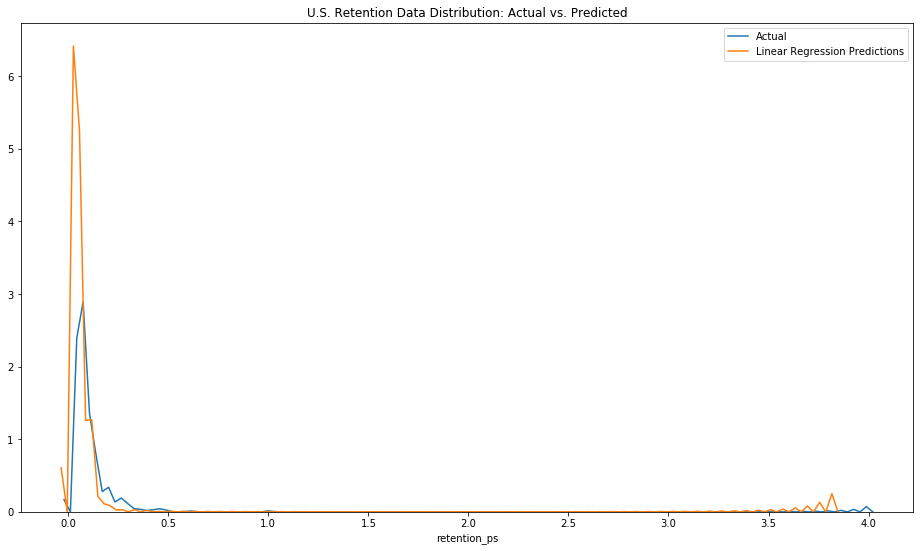

In [38]:
# Separate into X = all of the independent variables, and y = the independent variable (retentionss per student)
X = data.drop('state', axis=1).drop('retention_ps', axis=1)
y = data['retention_ps']

# Separate into train and test datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# Create the linear regression based on the training dataset
reg = sm.OLS(y_train, X_train).fit()

# Create a linear regression by inputting the test dataset into the above linear regression
prediction_reg = reg.predict(X_test)

# Create a plot to measure the predicted retention rates against the actual retention rates
f, ax = plt.subplots(figsize=(16,9))
plt.title('U.S. Retention Data Distribution: Actual vs. Predicted')
sns.distplot(y_test, hist=False, label="Actual", ax=ax)
sns.distplot(prediction_reg, hist=False, label="Linear Regression Predictions", ax=ax)
plt.show()

<p>The model looks like it performed pretty well, but let's take a look at some actual statistics and determine the success of the model using the F-Test for Goodness of Fit. Our model is significant if the F-Value is greater than the calculated F-Statistic and the p-value is less than alpha, which we will set at 0.01.</p>

In [26]:
test = reg.f_test(np.identity(len(reg.params)))
print('Calculated F-Stat :\t', str(ftest.ppf(.99,test.df_num,test.df_denom)))
print('           F-Value:\t', str(test.fvalue[0][0]))
print('           p-Value:\t', str(test.pvalue))

Calculated F-Stat :	 2.4094691674108293
           F-Value:	 2119.705076731072
           p-Value:	 0.0


<p>The F-Value is significantly higher than the F-Stat (more than 1000x), and the p-Value is effectively 0. Thus, our model is significant and can be trusted to predict the number of retentions per student at a given high school in the United States.

<h3>Linear regression for each state</h3>
<p>In a similar vein as we did when doing exploratory data analysis, we're going to create a linear regresssion for each state with a dropdown menu to visualize each one, one at a time.</p>

In [42]:
states_list = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

states = widgets.Dropdown(description='State: ', options=[states_list])
state = states.value

# Create a dictionary of state -> [y_test, actual_model, predicted_model]
models = {}

for state_ in states_list:
    X = data.loc[data['state'] == state_].drop('state', axis=1).drop('retention_ps', axis=1)
    y = data.loc[data['state'] == state_]['retention_ps']

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

    reg = sm.OLS(y_train, X_train).fit()
    prediction_reg = reg.predict(X_test)
    
    models[state_] = [y_test, reg, prediction_reg]

def plot(state):
    (y_test, reg, prediction_reg) = (models[state][0], models[state][1], models[state][2])
    
    f, ax = plt.subplots(figsize=(16,9))
    plt.title('{} Retention Data Distribution: Actual vs. Predicted'.format(state))
    sns.distplot(y_test, hist=False, label="Actual", ax=ax)
    sns.distplot(prediction_reg, hist=False, label="Linear Regression Predictions", ax=ax)
    plt.show()
    
interactive(plot, state=state)

interactive(children=(Dropdown(description='state', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', '…

<p>Looking through some states, the model seems to fit pretty well. For others, the model doesn't seem to fit very well. Let's evaluate these models the same way we did before.</p>

In [43]:
for state_ in states_list:
    reg = models[state_][1]
    test = reg.f_test(np.identity(len(reg.params)))
    print('===============================================')
    print('             State:\t', state_)
    print('Calculated F-Stat :\t', str(ftest.ppf(.99,test.df_num,test.df_denom)))
    print('           F-Value:\t', str(test.fvalue[0][0]))
    print('           p-Value:\t', str(test.pvalue))
    print('   p-Value <= 0.01?\t', 'YES' if test.pvalue <= 0.01 else 'NO')

             State:	 AL
Calculated F-Stat :	 2.5477483937719336
           F-Value:	 23.95913801753774
           p-Value:	 1.243312397592192e-23
   p-Value <= 0.01?	 YES
             State:	 AK
Calculated F-Stat :	 3.840638659897973
           F-Value:	 7.2138712988210285
           p-Value:	 0.0003460154431165542
   p-Value <= 0.01?	 YES
             State:	 AZ
Calculated F-Stat :	 2.6616174386346354
           F-Value:	 5.054104259046639
           p-Value:	 1.973791390119948e-05
   p-Value <= 0.01?	 YES
             State:	 AR
Calculated F-Stat :	 2.713069421126866
           F-Value:	 4.524921532917814
           p-Value:	 0.0001399459855657433
   p-Value <= 0.01?	 YES
             State:	 CA
Calculated F-Stat :	 2.5402514687704256
           F-Value:	 6.4126671664242085
           p-Value:	 5.0770802671833164e-08
   p-Value <= 0.01?	 YES
             State:	 CO
Calculated F-Stat :	 2.6335655473726
           F-Value:	 8.417585931291917
           p-Value:	 2.169604999171032e-09
 

<p>Most of theses have p-Values less than 0.01, which means that the model is statistically significant. Some, however, do not. For those states, we can conclude that at least from the data available we cannot predict to a statistically significant extent the number of retentions per student based on independent variables we have chosen. For the others, we can conclude that we can significantly predict this.</p>

<hr>
<center><h2>Conclusion, Policy Implications, & Further Exploration</h2></center>
<p>The Office for Civil Rights in the U.S. Department of Education collects an insane amount of civil rights-related data. Beyond the data I've analyzed in this tutorial, this data is further disaggregated by race, ethnicity, gender, disability status, and more. There is a lot more data analysis that could be done just on this dataset with regards to retention and punishment within U.S. schools.</p>
<p>One key insight from this tutorial is that the state (and likely the school district) that you're analyzing matters. As is common in education policy, this project cannot provide insights at a local district level, which is often the level that most education policy decisions are done and implemented. The best recommendation I can provide is to follow the methods I've used in this tutorial and examine your own school district. Maybe you'll find some interesting correlations that can help drive local policy recommendations.</p>
<p>I hope you enjoyed following along with this tutorial. Data analysis in education policy is a massive field that has barely been uncovered and if you're interested in exploring it further I highly recommend looking into open positions and internships at the variety of education policy thinktanks around the United States.</p>